<a href="https://colab.research.google.com/github/EstefRZ99/data-analysis-explorations/blob/main/Datasets_analysis_with_mtcars_%26_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
---
title: "Análisis de Datasets: mtcars e Iris"
author: "María Estefanny Ramírez"
date: "`r Sys.Date()`"
output: pdf_document
---

In [ ]:

# Introducción

#Este documento combina dos actividades de análisis de datos:
#1. **Actividad 1:** Exploración y visualización del dataset **mtcars** en R utilizando técnicas avanzadas de estadística descriptiva y visualización.
#2. **Actividad 2:** Análisis profundo del dataset **iris** utilizando Python (se ejecuta desde R Markdown con reticulate o se puede complementar en Google Colab).

#Cada sección incluye:
#- Carga del dataset.
#- Estadística descriptiva avanzada (medidas de tendencia central y dispersión).
#- Visualización de los datos con gráficos como histograma, diagramas de dispersión, boxplots, violin plots y gráficos de pares.
#- Preguntas de reflexión donde se justifica la elección de ciertos gráficos y se interpretan las distribuciones.



In [ ]:
# Cargar el dataset mtcars (este dataset viene incluido en base R)
data(mtcars)
head(mtcars)

In [ ]:
install.packages("dplyr")
library(dplyr)

# Función para calcular la moda
get_mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Cálculo de medidas de tendencia central
central_tendency <- mtcars %>%
  select(mpg, wt, hp) %>%
  summarise(across(everything(),
                   list(media = ~mean(.),
                        mediana = ~median(.),
                        moda = ~get_mode(.)),
                   .names = "{col}_{fn}"))

knitr::kable(central_tendency, caption = "Medidas de Tendencia Central para mpg, wt y hp")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union






Table: Medidas de Tendencia Central para mpg, wt y hp

| mpg_media| mpg_mediana| mpg_moda| wt_media| wt_mediana| wt_moda| hp_media| hp_mediana| hp_moda|
|---------:|-----------:|--------:|--------:|----------:|-------:|--------:|----------:|-------:|
|  20.09062|        19.2|       21|  3.21725|      3.325|    3.44| 146.6875|        123|     110|

In [ ]:
dispersion <- mtcars %>%
  select(mpg, wt, hp) %>%
  summarise(across(everything(),
                   list(Varianza = ~var(.),
                        DE = ~sd(.),
                        IQR = ~IQR(.)),
                   .names = "{col}_{fn}"))

knitr::kable(dispersion, caption = "Medidas de Dispersión para mpg, wt y hp")




Table: Medidas de Dispersión para mpg, wt y hp

| mpg_Varianza|   mpg_DE| mpg_IQR| wt_Varianza|     wt_DE|  wt_IQR| hp_Varianza|    hp_DE| hp_IQR|
|------------:|--------:|-------:|-----------:|---------:|-------:|-----------:|--------:|------:|
|      36.3241| 6.026948|   7.375|    0.957379| 0.9784574| 1.02875|    4700.867| 68.56287|   83.5|

In [ ]:
# Tabla de frecuencias para la columna 'cyl'
freq_table <- table(mtcars$cyl) %>%
  as.data.frame() %>%
  setNames(c("Cilindros", "Frecuencia"))

knitr::kable(freq_table, caption = "Tabla de Frecuencia para el número de cilindros")



Table: Tabla de Frecuencia para el número de cilindros

|Cilindros | Frecuencia|
|:---------|----------:|
|4         |         11|
|6         |          7|
|8         |         14|

Loading required package: ggplot2

Loading required package: RColorBrewer



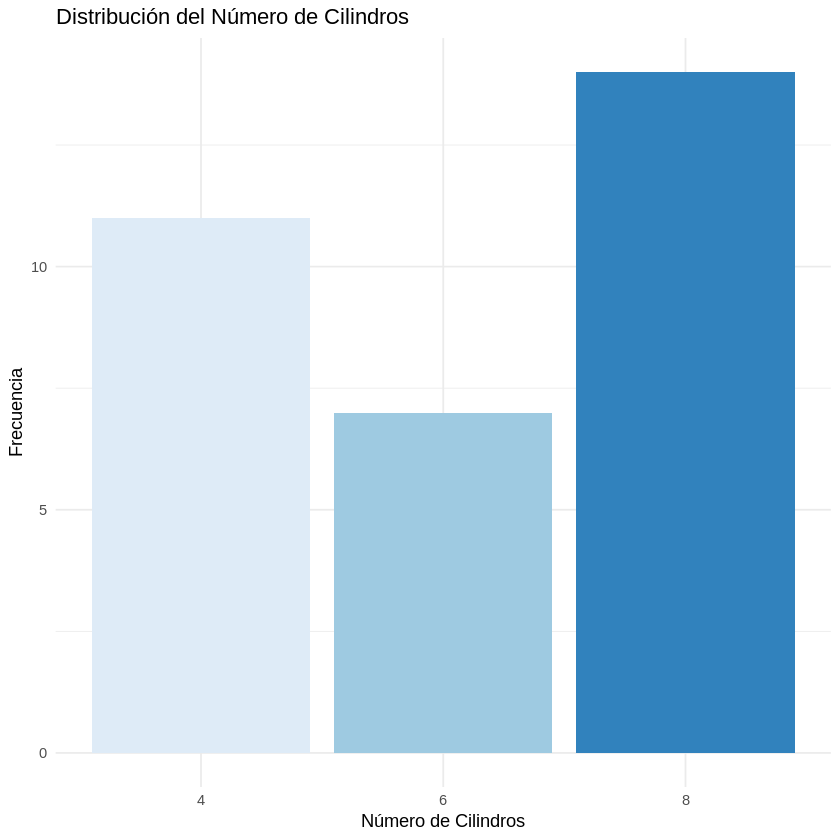

In [ ]:
# Install and load the necessary package (if you haven't already)
if(!require(ggplot2)){
  install.packages("ggplot2")
  library(ggplot2)
}

if(!require(RColorBrewer)){
  install.packages("RColorBrewer")
  library(RColorBrewer)
}


ggplot(mtcars, aes(x = factor(cyl))) +
  geom_bar(fill = brewer.pal(3,"Blues")) +
  labs(title = "Distribución del Número de Cilindros",
       x = "Número de Cilindros", y = "Frecuencia") +
  theme_minimal()

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


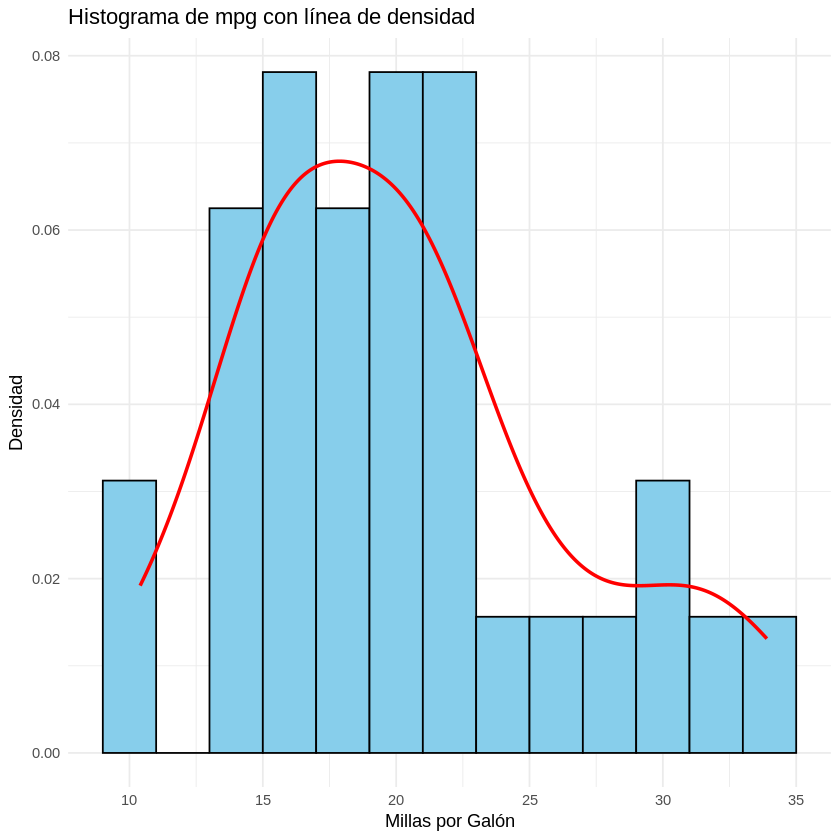

In [ ]:
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(aes(y = ..density..), binwidth = 2, fill = "skyblue", color = "black") +
  geom_density(color = "red", size = 1) +
  labs(title = "Histograma de mpg con línea de densidad",
       x = "Millas por Galón",
       y = "Densidad") +
  theme_minimal()


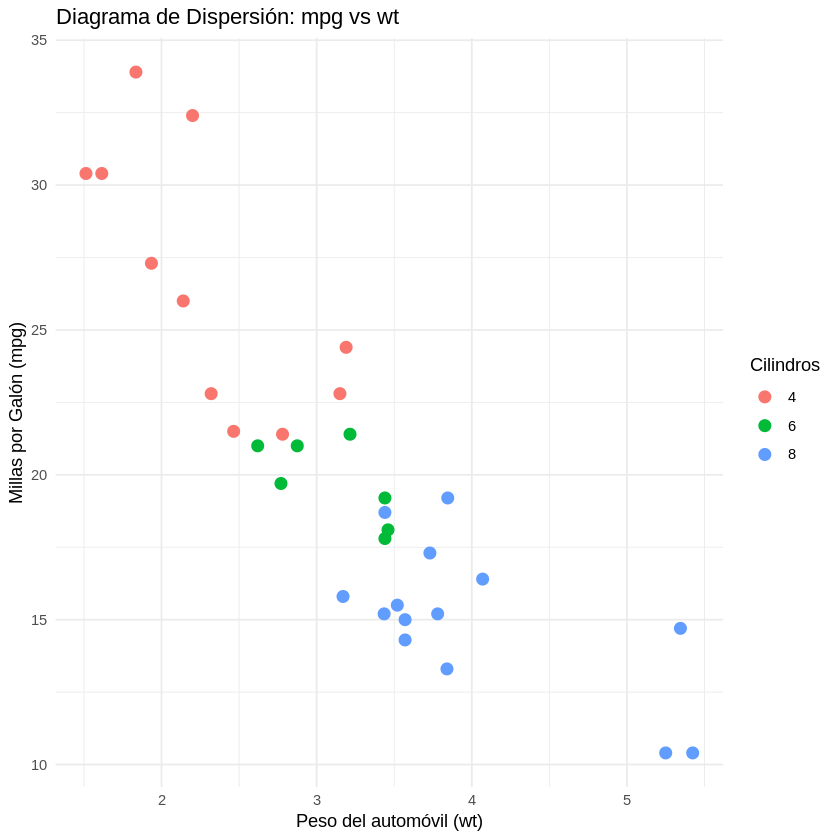

In [ ]:
ggplot(mtcars, aes(x = wt, y = mpg, color = factor(cyl))) +
  geom_point(size = 3) +
  labs(title = "Diagrama de Dispersión: mpg vs wt",
       x = "Peso del automóvil (wt)",
       y = "Millas por Galón (mpg)",
       color = "Cilindros") +
  theme_minimal()


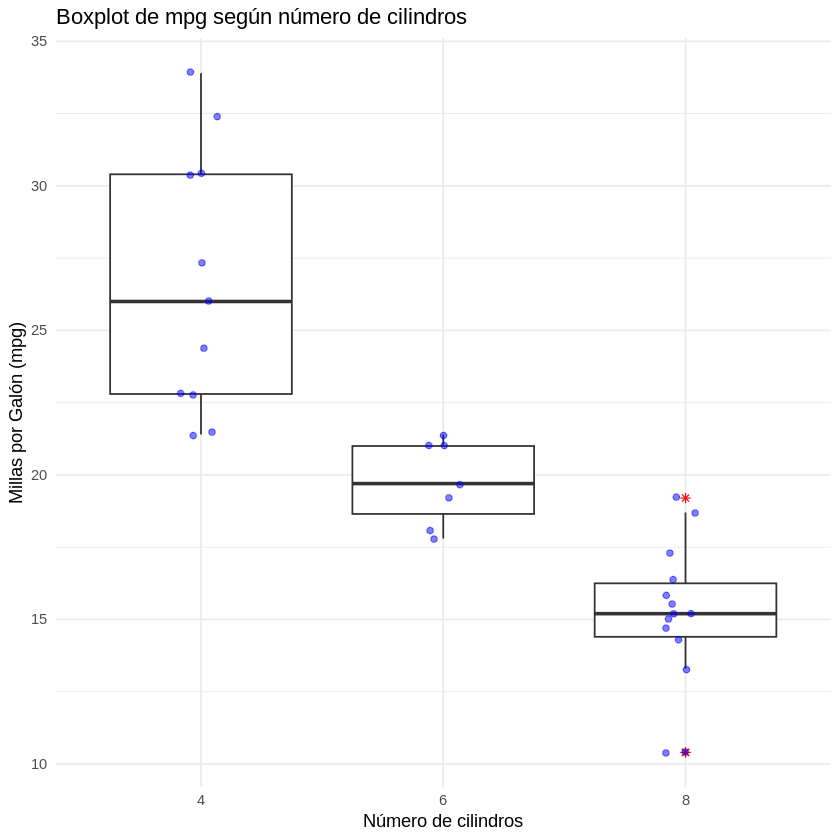

In [ ]:
ggplot(mtcars, aes(x = factor(cyl), y = mpg)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 8) +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue") +
  labs(title = "Boxplot de mpg según número de cilindros",
       x = "Número de cilindros",
       y = "Millas por Galón (mpg)") +
  theme_minimal()


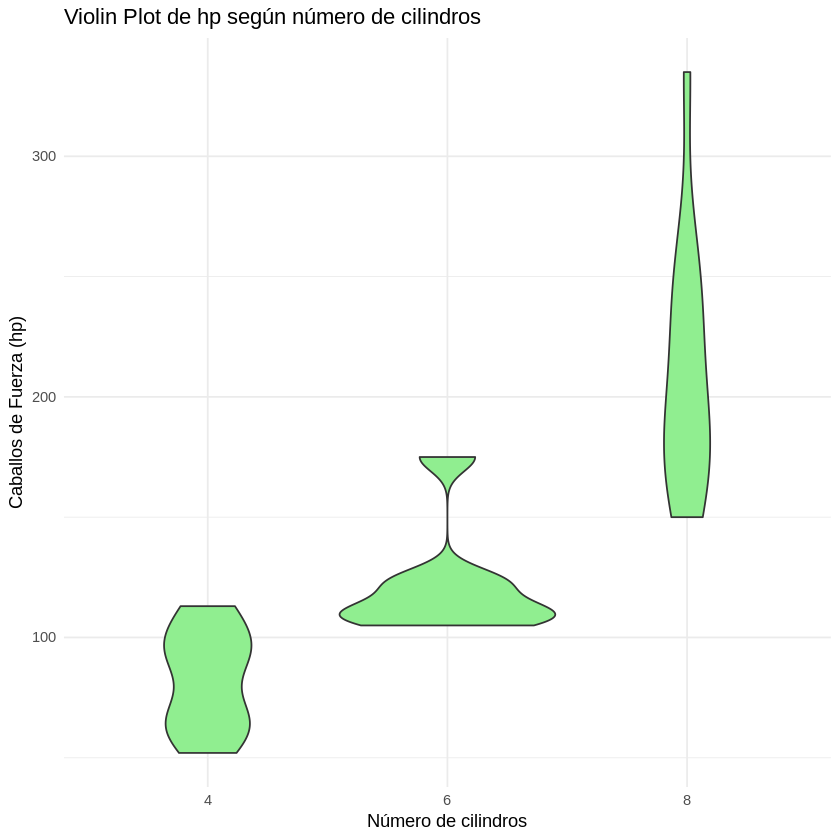

In [ ]:
ggplot(mtcars, aes(x = factor(cyl), y = hp)) +
  geom_violin(fill = "lightgreen") +
  labs(title = "Violin Plot de hp según número de cilindros",
       x = "Número de cilindros",
       y = "Caballos de Fuerza (hp)") +
  theme_minimal()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



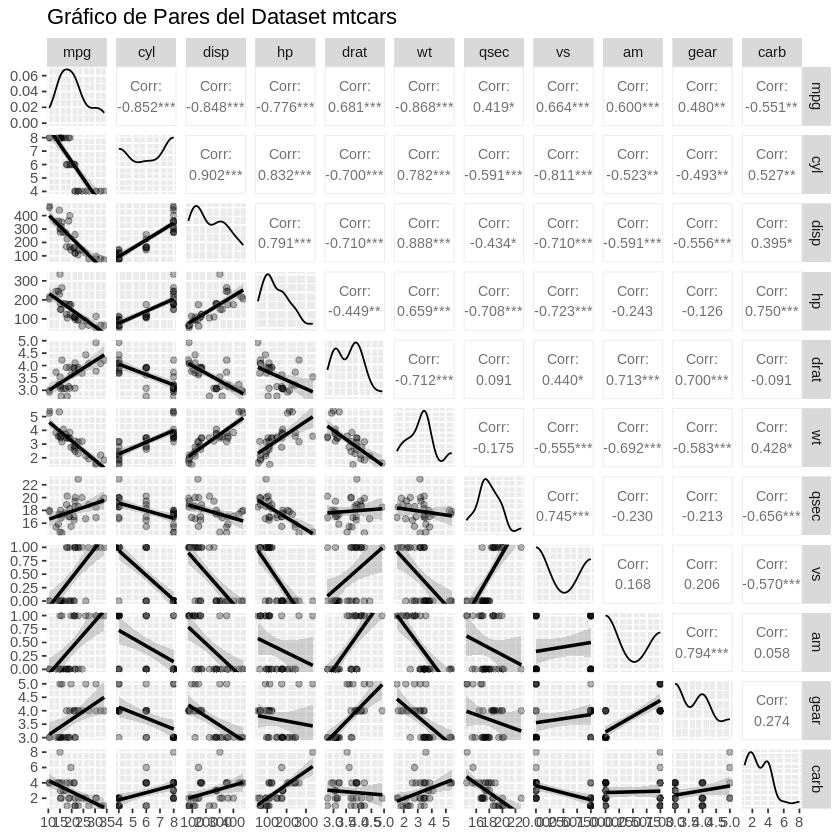

In [ ]:
install.packages("GGally")
library(GGally)

library(GGally)
ggpairs(mtcars,
        upper = list(continuous = wrap("cor", size = 3)),
        lower = list(continuous = wrap("smooth", alpha = 0.3)),
        title = "Gráfico de Pares del Dataset mtcars")


Preguntas de Reflexión
1. ¿Qué tipo de gráfica elegirías para representar la relación entre hp (caballos de fuerza) y mpg? Justifica tu elección.



Elegiría un scatter plot (diagrama de dispersión) para representar la relación entre hp y mpg.

Justificación:

El scatter plot es ideal para mostrar la distribución de los datos y visualizar cómo varía una variable en función de otra.

Permite detectar de forma inmediata si existe una correlación (por ejemplo, una correlación negativa, donde a mayor hp, menor mpg) o si hay patrones atípicos (outliers).

Además, al usar colores o tamaños para diferenciar otras variables (como el número de cilindros), se puede añadir información extra sobre cómo se comportan diferentes subgrupos dentro del dataset.

2. ¿Cómo interpretarías la distribución de mpg en el gráfico de caja según el número de cilindros?

Respuesta Sugerida:
El boxplot de mpg según el número de cilindros permite interpretar la distribución de la siguiente manera:

Mediana: La línea central de cada caja muestra el valor mediano de mpg. Comparar estas medianas entre distintos grupos de cilindros nos permite identificar qué grupo, en promedio, tiene un consumo más alto o bajo.

Cuartiles e IQR: Los bordes de la caja representan el primer (25%) y el tercer (75%) cuartil, respectivamente, y la distancia entre ellos (IQR) indica la dispersión de la mitad central de los datos. Un IQR mayor sugiere mayor variabilidad en el rendimiento dentro de ese grupo.

Outliers: Los puntos que se encuentran fuera de la caja indican valores atípicos. Si se observan muchos outliers en un grupo, podría significar que hay variaciones muy pronunciadas dentro de ese subconjunto.

Comparación Entre Grupos: Por ejemplo, si el grupo de autos con 4 cilindros muestra una mediana más alta (mayor mpg) y una menor dispersión, se puede inferir que, en general, estos autos son más eficientes en cuanto a consumo de combustible. Por el contrario, si los autos con 8 cilindros presentan una mediana más baja y un IQR mayor, significa que, en promedio, tienen un menor rendimiento (menos mpg) y mayor variabilidad en el rendimiento.

